# Análise de Dados da COVID 19 no estado de São Paulo

Este projeto analisa os dados dos casos de covid 19 no estado de São Paulo do período de fevereiro de 2020 à setembro de 2021

Os dados esão disponíveis nos sites:

- https://www.seade.gov.br/coronavirus/#
- https://github.com/seade-R/dados-covid-sp
- https://www.seade.gov.br

In [3]:
import numpy as np
import pandas as pd

In [4]:
covid = pd.read_csv("../dados_covid_sp.csv", sep=";", encoding="utf-8")

In [5]:
covid.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [6]:
covid.shape

(374034, 26)

In [7]:
covid = covid.rename(columns={"nome_munic": "municipio", "datahora": "data"})
covid.area = covid.area / 100

In [8]:
# Análise dos atributos
covid.dtypes

municipio         object
codigo_ibge        int64
dia                int64
mes                int64
data              object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d        object
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d       object
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area             float64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

### Filtrando duas cidade: Campinas e Guarulhos

In [9]:
covid_campinas = covid.loc[covid.municipio == "Campinas"]
covid_campinas.head(3)

,municipio,codigo_ibge,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
108,Campinas,3509502,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9
753,Campinas,3509502,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9
1398,Campinas,3509502,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9


In [10]:
# Criação de uma coluna com a porcentagem de idosos
covid_campinas["porcentagem_idosos"] = 100 * covid_campinas["pop_60"] / covid_campinas["pop"]
covid_campinas.head(3)

C:\Users\vitor\AppData\Local\Temp\ipykernel_3472\1938864690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_campinas["porcentagem_idosos"] = 100 * covid_campinas["pop_60"] / covid_campinas["pop"]


,municipio,codigo_ibge,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,porcentagem_idosos
108,Campinas,3509502,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9,16.401177
753,Campinas,3509502,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9,16.401177
1398,Campinas,3509502,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9,16.401177


In [11]:
covid_guarulhos = covid.loc[covid.municipio == "Guarulhos"]
covid_guarulhos.head(3)

,municipio,codigo_ibge,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
212,Guarulhos,3518800,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Grande São Paulo,10,1351275,162662,318.68,0,8.0,"-23,4538","-46,5333",9
857,Guarulhos,3518800,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Grande São Paulo,10,1351275,162662,318.68,0,8.0,"-23,4538","-46,5333",9
1502,Guarulhos,3518800,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Grande São Paulo,10,1351275,162662,318.68,0,8.0,"-23,4538","-46,5333",9


In [12]:
# Criação de uma coluna com a porcentagem de idosos
covid_guarulhos["porcentagem_idosos"] = 100 * covid_guarulhos["pop_60"] / covid_guarulhos["pop"]
covid_guarulhos.head(3)

C:\Users\vitor\AppData\Local\Temp\ipykernel_3472\61854847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_guarulhos["porcentagem_idosos"] = 100 * covid_guarulhos["pop_60"] / covid_guarulhos["pop"]


,municipio,codigo_ibge,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,porcentagem_idosos
212,Guarulhos,3518800,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,10,1351275,162662,318.68,0,8.0,"-23,4538","-46,5333",9,12.037668
857,Guarulhos,3518800,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,10,1351275,162662,318.68,0,8.0,"-23,4538","-46,5333",9,12.037668
1502,Guarulhos,3518800,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,10,1351275,162662,318.68,0,8.0,"-23,4538","-46,5333",9,12.037668


### Medidas de Centralidade

#### Média

##### Campinas

In [13]:
# ".mean()" trará a média
covid_campinas["obitos_novos"].mean()

7.721934369602764

In [14]:
covid_campinas.casos_novos.mean()

194.88946459412782

##### Guarulhos

In [15]:
covid_guarulhos["obitos_novos"].mean()

8.404145077720207

In [16]:
covid_guarulhos.casos_novos.mean()

109.49568221070811

#### Mediana

##### Campinas

In [17]:
covid_campinas["obitos_novos"].median()

5.0

In [18]:
covid_campinas.casos_novos.median()

148.0

##### Guarulhos

In [19]:
covid_guarulhos["obitos_novos"].median()

4.0

In [20]:
covid_guarulhos.casos_novos.median()

87.0

#### Moda

##### Campinas

In [21]:
covid_campinas["obitos_novos"].mode()

0    0
Name: obitos_novos, dtype: int64

In [22]:
covid_campinas["dia"].mode()

0    25
Name: dia, dtype: int64

##### Guarulhos

In [23]:
covid_guarulhos["obitos_novos"].mode()

0    0
Name: obitos_novos, dtype: int64

In [24]:
covid_guarulhos["dia"].mode()

0    25
Name: dia, dtype: int64

#### Descrição geral

In [25]:
covid_campinas.describe()

,codigo_ibge,dia,mes,casos,casos_novos,obitos,obitos_novos,cod_ra,cod_drs,pop,pop_60,area,map_leg_s,semana_epidem,porcentagem_idosos
count,579.0,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.0,579.0,579.0,579.0,5.790000e+02,579.000000,579.000000,5.790000e+02
mean,3509502.0,15.737478,6.269430,46549.331606,194.889465,1763.333333,7.721934,4.0,3.0,1175501.0,192796.0,7.945700e+02,1.787565,25.792746,1.640118e+01
std,0.0,8.803909,3.024688,36212.354082,173.933661,1427.149566,8.957631,0.0,0.0,0.0,0.0,5.803042e-12,1.882753,13.389761,8.533886e-14
min,3509502.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.0,3.0,1175501.0,192796.0,7.945700e+02,1.000000,1.000000,1.640118e+01
25%,3509502.0,8.000000,4.000000,12926.000000,39.000000,540.500000,1.000000,4.0,3.0,1175501.0,192796.0,7.945700e+02,1.000000,15.000000,1.640118e+01
50%,3509502.0,16.000000,6.000000,39112.000000,148.000000,1407.000000,5.000000,4.0,3.0,1175501.0,192796.0,7.945700e+02,1.000000,25.000000,1.640118e+01
75%,3509502.0,23.000000,9.000000,77445.500000,326.000000,3048.500000,12.000000,4.0,3.0,1175501.0,192796.0,7.945700e+02,1.000000,36.000000,1.640118e+01
max,3509502.0,31.000000,12.000000,112841.000000,1080.000000,4471.000000,67.000000,4.0,3.0,1175501.0,192796.0,7.945700e+02,8.000000,53.000000,1.640118e+01


In [26]:
covid_guarulhos["casos_novos"].describe()

count    579.000000
mean     109.495682
std      100.261861
min        0.000000
25%       27.500000
50%       87.000000
75%      161.000000
max      698.000000
Name: casos_novos, dtype: float64

#### Distribuição de Frequências: Histograma

In [27]:
covid_campinas2021 = covid_campinas.loc[covid_campinas.data > "2020-12-31"]
covid_guarulhos2021 = covid_guarulhos.loc[covid_guarulhos.data > "2020-12-31"]

In [28]:
covid_campinas2021.head(3)

,municipio,codigo_ibge,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,porcentagem_idosos
200703,Campinas,3509502,1,1,2021-01-01,43502,92,"3,70071994834543e+03","205,285714285714278",1474,...,3,1175501,192796,794.57,>5000,1.0,"-22,9053","-47,0659",53,16.401177
201348,Campinas,3509502,2,1,2021-01-02,43508,6,"3,70123036900862e+03","203,857142857142861",1475,...,3,1175501,192796,794.57,>5000,1.0,"-22,9053","-47,0659",53,16.401177
201993,Campinas,3509502,3,1,2021-01-03,43561,53,"3,70573908486679e+03","207,428571428571416",1476,...,3,1175501,192796,794.57,>5000,1.0,"-22,9053","-47,0659",1,16.401177


In [29]:
# Média de obitos de todo o período na cidade de Campinas
covid_campinas["obitos_novos"].mean()

7.721934369602764

In [30]:
# Média de obitos no ano de 2021 na cidade de Campinas
covid_campinas2021["obitos_novos"].mean()

11.182835820895523

In [31]:
import plotly.express as px

In [32]:
# "x" Representa o eixo X do gráfico, recebe a variável que será analisada
# "nbins" É a largura das faixas de distribuição de frequência
grafico = px.histogram(covid_campinas2021, x="obitos_novos", nbins=30)
grafico.update_layout(width=400, height=400, title_text="Óbitos novos em Campinas em 2021")
grafico.show()

In [33]:
grafico = px.histogram(covid_guarulhos2021, x="obitos_novos", nbins=30)
grafico.update_layout(width=400, height=400, title_text="Óbitos novos em Guarulhos em 2021")
grafico.show()

### Medidas de Posição

In [34]:
# Mínimo de casos
print("Mínimo de casos em Campinas:  " + str(covid_campinas["casos_novos"].min()))
print("Mínimo de casos em Guarulhos:  " + str(covid_guarulhos["casos_novos"].min()))

Mínimo de casos em Campinas:  0
Mínimo de casos em Guarulhos:  0


In [35]:
# Máximo de casos
print("Máximo de casos em Campinas:  " + str(covid_campinas["casos_novos"].max()))
print("Máximo de casos em Guarulhos:  " + str(covid_guarulhos["casos_novos"].max()))

Máximo de casos em Campinas:  1080
Máximo de casos em Guarulhos:  698


In [36]:
# Mínimo de óbitos
print("Mínimo de óbitos em Campinas:  " + str(covid_campinas["obitos_novos"].min()))
print("Mínimo de óbitos em Guarulhos:  " + str(covid_guarulhos["obitos_novos"].min()))

Mínimo de óbitos em Campinas:  0
Mínimo de óbitos em Guarulhos:  0


In [37]:
# Máximo de óbitos
print("Máximo de óbitos em Campinas:  " + str(covid_campinas["obitos_novos"].max()))
print("Máximo de óbitos em Guarulhos:  " + str(covid_guarulhos["obitos_novos"].max()))

Máximo de óbitos em Campinas:  67
Máximo de óbitos em Guarulhos:  77


In [38]:
# Primeiro quartil
covid_campinas["casos_novos"].quantile(q=0.25)

39.0

In [39]:
covid_campinas["casos_novos"].quantile(q=0.5)

148.0

In [40]:
covid_campinas["casos_novos"].quantile(q=0.75)

326.0

In [41]:
round(covid_campinas["casos_novos"].quantile(q=0.99),2)

625.98

### Gráfico BoxPlot e Outliers

In [42]:
import plotly.express as px

##### Campinas

In [43]:
# "y" Vai representar uma variável
grafico = px.box(covid_campinas, y="casos_novos")
grafico.show()

In [44]:
outlier_sup = covid_campinas.casos_novos.quantile(q=0.75) + 1.5 * (covid_campinas.casos_novos.quantile(q=0.75) - covid_campinas.casos_novos.quantile(q=0.25))
outlier_sup

756.5

In [45]:
outlier_inf = covid_campinas.casos_novos.quantile(q=0.25) - 1.5 * (covid_campinas.casos_novos.quantile(q=0.75) - covid_campinas.casos_novos.quantile(q=0.25))
outlier_inf

-391.5

In [46]:
sem_outliers = covid_campinas.loc[covid_campinas.casos_novos <= outlier_sup]
sem_outliers.head(3)

,municipio,codigo_ibge,dia,mes,data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,porcentagem_idosos
108,Campinas,3509502,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9,16.401177
753,Campinas,3509502,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9,16.401177
1398,Campinas,3509502,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,3,1175501,192796,794.57,0,8.0,"-22,9053","-47,0659",9,16.401177


In [47]:
grafico = px.box(sem_outliers, y="casos_novos")
grafico.show()

### Medidas de Dispersão

In [48]:
# Variância de óbitos novos
var_gr = round(covid_guarulhos["obitos_novos"].var(), 2)
var_camp = round(covid_campinas["obitos_novos"].var(), 2)
f"Guarulhos:  {var_gr}",f"Campinas:  {var_camp}"

('Guarulhos:  132.51', 'Campinas:  80.24')

In [49]:
# Desvio padrão de óbitos novos
dsv_gr = round(covid_guarulhos["obitos_novos"].std(), 2)
dsv_camp = round(covid_campinas["obitos_novos"].std(), 2)
f"Guarulhos:  {dsv_gr}", f"Campinas:  {dsv_camp}"

('Guarulhos:  11.51', 'Campinas:  8.96')

In [50]:
# Variância de casos novos
var_gr_casos = round(covid_guarulhos["casos_novos"].var(), 2)
var_camp_casos = round(covid_campinas["casos_novos"].var(), 2)
f"Guarulhos:  {var_gr_casos}",f"Campinas:  {var_camp_casos}"

('Guarulhos:  10052.44', 'Campinas:  30252.92')

In [51]:
# Desvio padrão de casos novos
dsv_gr_casos = round(covid_guarulhos["casos_novos"].std(), 2)
dsv_camp_casos = round(covid_campinas["casos_novos"].std(), 2)
f"Guarulhos:  {dsv_gr_casos}", f"Campinas:  {dsv_camp_casos}"

('Guarulhos:  100.26', 'Campinas:  173.93')

### Testes de normalidade

##### Existem tester de normalidade numéricos e testes gráficos:
- Shapiro-Wilk (limite de 5000 amostras)
- Kolmogorov-Smirnov
- Histograma
- QQplot

##### Histograma

<Axes: xlabel='casos_novos', ylabel='Probability'>

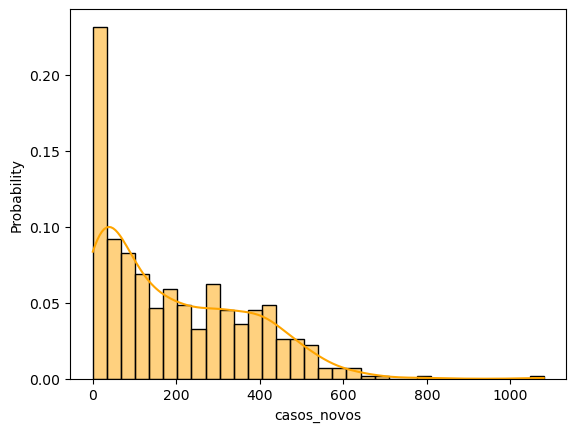

In [52]:
import seaborn as sns

# "kde" vai traçar uma linha de tendência
# "stat" vai colocar no eixo Y vários pontos de referência
sns.histplot(covid_campinas, x="casos_novos", bins=32, color="orange", kde=True, stat="probability")

##### QQPLOT

In [53]:
import scipy.stats as stats
import matplotlib.pyplot as plt

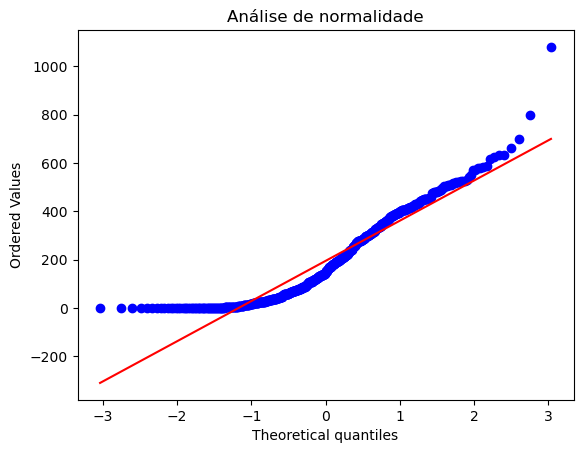

In [55]:
# "probplot" é usado para plotar um gráfico, usa uma coluna da base de dados "covid_campinas",
# em "dist" será análisada a distribuição (nesse caso "norm" que é a distribuição normal),
# e "plot" recebe o matplotlib.pyplot
stats.probplot(covid_campinas.casos_novos, dist="norm", plot=plt)
plt.title("Análise de normalidade")
plt.show()

##### Teste de Shapiro-Wilk

CRITÉRIOS:
- Nível de significância de 0,05% ou 5% (mais utilizado)
- Quando p > 0,05% (distribuição normal)

In [56]:
stats.shapiro(covid_campinas.casos_novos)

ShapiroResult(statistic=0.9063183069229126, pvalue=2.1796114015001836e-18)

In [57]:
estatistica, p = stats.shapiro(covid_campinas.casos_novos)

In [59]:
print("Estatística do teste (W) = ", round(estatistica,2))

Estatística do teste (W) =  0.91


In [60]:
print("p_valor = ", p)

p_valor =  2.1796114015001836e-18


##### Teste Lilliefors (Kolmogorov-Smirnov)

In [62]:
from statsmodels.stats.diagnostic import lilliefors
import statsmodels

In [65]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(covid_campinas.casos_novos, dist="norm")
print("Estatística do teste (D) = ", round(estatistica, 2))
print("p_valor = ", p)

Estatística do teste (D) =  0.13
p_valor =  0.0009999999999998899
